# Imports iniciais

In [88]:
import pandas as pd
import random
import nltk # pip3 install nltk
from LSTM import *
from common import *

random.seed(42)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bianc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bianc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
PATH_DATASET_NER = "../datasets/NER_dataset.json"

In [18]:
df = pd.read_json(PATH_DATASET_NER)
df.head()

,annotations
0,"[[De, jeito, nenhum.], [ENTITY_PREFERENCE, ENT..."
1,"[[Super-herói, de, ficção, científica], [ENTIT..."
10,"[[Eu, não, me, lembro, exatamente., Nós, assis..."
100,"[[Eu, curto, assistir, filmes, de, comédia, ro..."
101,"[[Eu, sou, fã, de, séries, de, ficção, científ..."


In [19]:
ner_df = df["annotations"]

# Analisando o dataset

In [81]:
text_entries = []

for element in df.annotations:
    text_entries.append(element[0])

len(text_entries), text_entries[:10]

(104,
 [['De', 'jeito', 'nenhum.'],
  ['Super-herói', 'de', 'ficção', 'científica'],
  ['Eu',
   'não',
   'me',
   'lembro',
   'exatamente.',
   'Nós',
   'assistimos',
   'isso',
   'na',
   'escola',
   'e',
   'eu',
   'só',
   'me',
   'lembro',
   'de',
   'ficar',
   'realmente',
   'entediado',
   'com',
   'isso',
   'quando',
   'todo',
   'mundo',
   'gostou',
   'e',
   'eu',
   'não',
   'entendi',
   'por',
   'que',
   'as',
   'pessoas',
   'gostaram.',
   'Era',
   'como',
   'um',
   'conto',
   'moderno',
   'e',
   'uma',
   'história',
   'de',
   'fantasia',
   'e',
   'eu',
   'simplesmente',
   'não',
   'gostei'],
  ['Eu', 'curto', 'assistir', 'filmes', 'de', 'comédia', 'romântica'],
  ['Eu', 'sou', 'fã', 'de', 'séries', 'de', 'ficção', 'científica'],
  ['Eu', 'adoro', 'assistir', 'animações', 'da', 'Pixar'],
  ['Eu',
   'fico',
   'fascinado',
   'por',
   'documentários',
   'sobre',
   'o',
   'universo'],
  ['Bem,',
   'é',
   'futurista',
   ',',
   'ficç

In [86]:
conc_text = "\n".join([" ".join(entries) for entries in text_entries]).lower()
conc_text[:10]

'de jeito n'

In [89]:
tokenized_words = nltk.tokenize.word_tokenize(remove_punctuation(conc_text), language="portuguese")
tokenized_words[:10]

['de',
 'jeito',
 'nenhum',
 'superherói',
 'de',
 'ficção',
 'científica',
 'eu',
 'não',
 'me']

In [90]:
stopwords_pt = nltk.corpus.stopwords.words('portuguese')
stopwords_pt[:10]

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

## Tamanho do vocabulário

In [91]:
print(f"O tamanho do vocabulário é {len(set(tokenized_words))}")

O tamanho do vocabulário é 443


## Tamanho das Sentenças

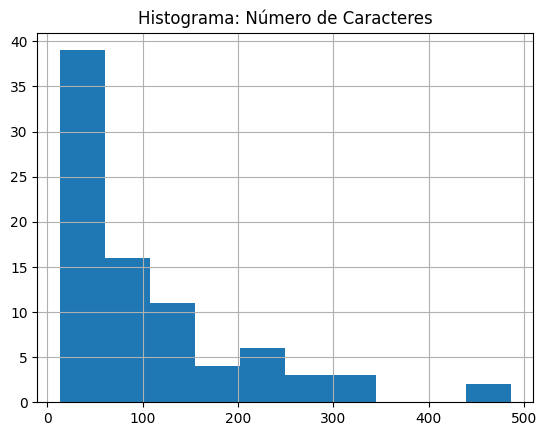

In [33]:
plot_hist([len(phrase) for phrase in text_entries], title="Histograma: Número de Caracteres")

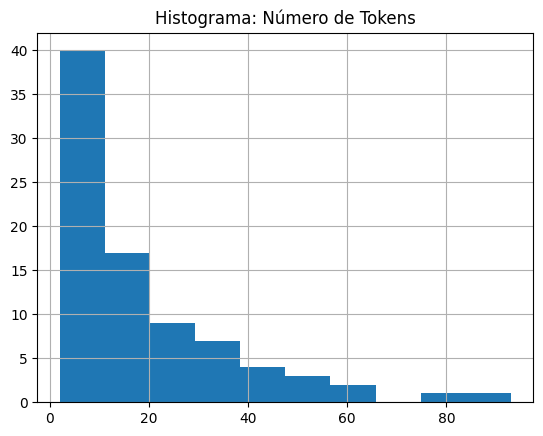

In [34]:
plot_hist([len(nltk.tokenize.word_tokenize(remove_punctuation(phrase), language="portuguese")) for phrase in text_entries], "Histograma: Número de Tokens")

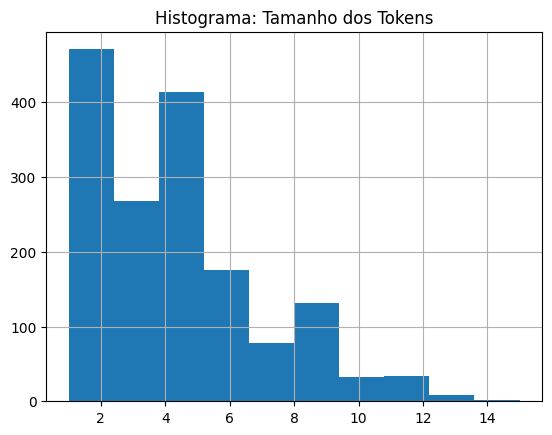

In [35]:
plot_hist([len(tk) for tk in tokenized_words], "Histograma: Tamanho dos Tokens")

## Palavras mais comuns

<Axes: >

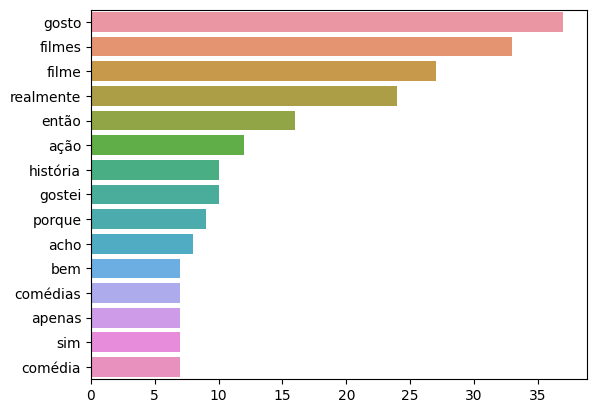

In [42]:
plot_most_frequent_word(tokenized_words, stopwords_pt)

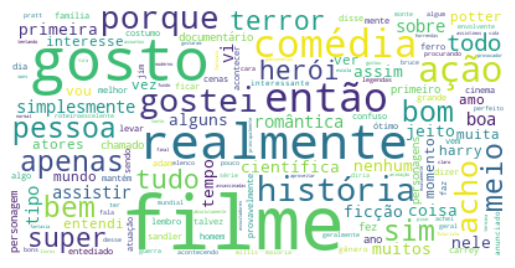

In [48]:
cloud_of_words(conc_text, stopwords_pt)

# Separando o dataset

In [7]:
random.shuffle(ner_df)
ner_df[:3]

[(['A', 'Ressaca.'], ['ENTITY_NAME', 'ENTITY_NAME']),
 (['Eu', 'também', 'gosto', 'de', 'Chris', 'Pratt.'],
  ['ENTITY_PREFERENCE',
   'ENTITY_PREFERENCE',
   'ENTITY_PREFERENCE',
   'O',
   'ENTITY_ACTOR',
   'ENTITY_ACTOR']),
 (['Eu', 'não', 'gostei', 'da', 'Liga', 'da', 'Justiça'],
  ['ENTITY_PREFERENCE',
   'ENTITY_PREFERENCE',
   'ENTITY_PREFERENCE',
   'O',
   'ENTITY_NAME',
   'ENTITY_NAME',
   'ENTITY_NAME'])]

In [20]:
df_train = ner_df[:int(len(ner_df)*0.6)]
df_test = ner_df[int(len(ner_df)*0.6):int(len(ner_df)*0.8)]
df_val = ner_df[int(len(ner_df)*0.8):]

len(df_train), len(df_test), len(df_val)

(62, 21, 21)

# Treinando o Extrator

## LSTM

In [61]:
word_to_ix, tag_to_ix = one_hot_encoding_mapper(ner_df)

In [70]:
EMBEDDING_DIM = 32
HIDDEN_DIM = 16
OUTPUT_DIM = 5  # Número de tags de saída
NUM_EPOCHS = 100

In [72]:
model = train_lstm(NUM_EPOCHS, df_train, df_val, word_to_ix, tag_to_ix, EMBEDDING_DIM, HIDDEN_DIM)

Treinando LSTM no device cuda


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1, Validation Loss: 1.4565247240520658
Epoch 2, Validation Loss: 1.2994163831075032
Epoch 3, Validation Loss: 1.183309086731502
Epoch 4, Validation Loss: 1.1268897595859708
Epoch 5, Validation Loss: 1.1040248232228416
Epoch 6, Validation Loss: 1.097018933012372
Epoch 7, Validation Loss: 1.099369995650791
Epoch 8, Validation Loss: 1.1058547298113506
Epoch 9, Validation Loss: 1.1135838131109874
Epoch 10, Validation Loss: 1.1205502237592424
Epoch 11, Validation Loss: 1.1256624559561412
Early stopping!


In [80]:
test_LSTM(model, word_to_ix, tag_to_ix, df_test)

Test Accuracy: 0.6191950464396285
